# Analysis file for: "The comparable strategic flexibility of model-free and model-based learning"

### Alexandre Filipowicz, Jonathan Levine, Eurgenio Piasini, Gaia Tavoni, Joseph Kable, & Joshua Gold

Analyses for the pre-print "The comparable strategic flexibility of model-free and model-based learning" ([https://doi.org/10.1101/2019.12.28.879965](https://doi.org/10.1101/2019.12.28.879965)). The following code produces all of the figures and analyses used in the preprint, in the order in which they appear.

## 0) Load libraries

In [8]:
%pylab
%matplotlib inline
import pandas as pd
import numpy as np
from numba import jit
from scipy import stats
from scipy.stats import spearmanr, pearsonr, entropy
import glob, pickle, os, pingouin
import statsmodels.formula.api as sm
import scipy.io as spio

import sys, csv

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


tornado.application - ERROR - Exception in callback functools.partial(<function Kernel.enter_eventloop.<locals>.advance_eventloop at 0x1a1d9fdf80>)
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/opt/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 310, in advance_eventloop
    eventloop(self)
TypeError: 'NoneType' object is not callable


## Figure 1 - Example sequence of reward probabilities

Figure to give an example of how the second-step reward probabilities change throughout the task.

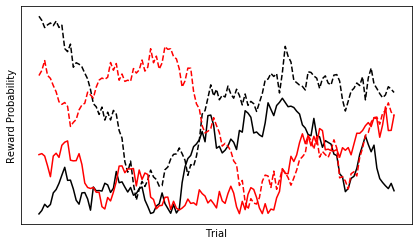

In [9]:
# Load csv with example second-step reward probabilities
f1_ex = pd.read_csv('../Figures/Figure1/RewProb.csv')
sub = 'subject_3'
tr = np.arange(1,126)

sdat = f1_ex.loc[f1_ex.Sub == sub].copy()
sdat = sdat.iloc[25:151].copy()

figure(1,(7,4))
plot(tr,sdat['One'],'-k')
plot(tr,sdat['Two'],'--k')
plot(tr,sdat['Three'],'-r')
plot(tr,sdat['Four'],'--r')
ylabel('Reward Probability')
xlabel('Trial')
yticks([])
xticks([])
savefig('../Figures/Figure1/Fig1_rew_ex.eps')

## Figure 3 - Information complexity vs main effect and interaction terms

Partial correlations between Main effect (measure of degree to which people are model-free) and Interaction terms (measure of the degree to which people are model-based).

Main effect and Interaction correlation
SpearmanrResult(correlation=-0.26045689221161555, pvalue=0.00021865518297142374)


Main effect vs Information complexity
            n         r         CI95%        r2    adj_r2         p-val  \
spearman  197  0.350106  [0.22, 0.47]  0.122574  0.113529  4.577261e-07   

             power  
spearman  0.999165  


Interaction vs Inforamtion Complexity
            n         r         CI95%        r2    adj_r2         p-val  \
spearman  197  0.366711  [0.24, 0.48]  0.134477  0.125554  1.157464e-07   

             power  
spearman  0.999675  


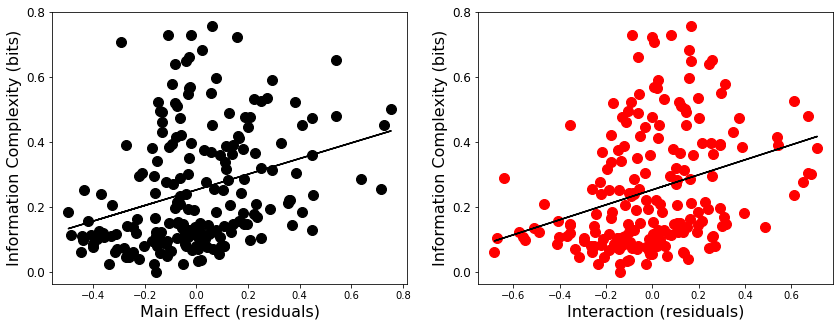

In [3]:
# Import complexity data and other behavioral metrics
# Values below computed in Filipowicz_etal_MBMF_Bound_Computing.ipynb
subInfo = pickle.load(open('./data/sub_cx_behav.pkl','rb'))

# Get computed information complexity values
ipasts = np.array([subInfo[key]['Ipast_all'] for key in subInfo.keys()])

# Get computed interaction and main effect values
inter = np.array([subInfo[key]['Int'] for key in subInfo.keys()])
me = np.array([subInfo[key]['ME'] for key in subInfo.keys()])

# Compute negative correlation between interaction and main effect
print('Main effect and Interaction correlation')
print(spearmanr(me,inter))

# Compute semi-partial spearman correlations since main effects and interactions are negatively correlated
cx_me_int_df = pd.DataFrame({'Complexity':ipasts,'ME':me,'Inter':inter})
spcor_cx_me = pingouin.partial_corr(data=cx_me_int_df,x='Complexity',y='ME',y_covar='Inter',method='spearman')
spcor_cx_int = pingouin.partial_corr(data=cx_me_int_df,x='Complexity',y='Inter',y_covar='ME',method='spearman')
print('\n\nMain effect vs Information complexity')
print(spcor_cx_me)
print('\n\nInteraction vs Inforamtion Complexity')
print(spcor_cx_int)

# Get residuals for plots below
# Main effect residuals
test_me_resid = sm.ols(formula='ME ~ Inter',data=cx_me_int_df).fit()
me_pred = test_me_resid.predict(cx_me_int_df[['Inter']])
me_resid = cx_me_int_df['ME'].values-me_pred

# Interaction residuals
test_int_resid = sm.ols(formula='Inter ~ ME',data=cx_me_int_df).fit()
int_pred = test_int_resid.predict(cx_me_int_df[['ME']])
int_resid = cx_me_int_df['Inter'].values-int_pred

# Plot correlations with information complexity
figure(2,(14,5))
subplot(1,2,1)
plot(me_resid,ipasts,'ok',markersize=10)
z = np.polyfit(me_resid, ipasts, 1)
p = np.poly1d(z)
plot(me_resid,p(me_resid),"k-")
ylabel('Information Complexity (bits)',size=16)
xlabel('Main Effect (residuals)',size=16)
yticks([0,.2,.4,.6,.8],size=12)

subplot(1,2,2)
plot(int_resid,ipasts,'or',markersize=10)
z = np.polyfit(int_resid, ipasts, 1)
p = np.poly1d(z)
plot(int_resid,p(int_resid),"k-")
ylabel('Information Complexity (bits)',size=16)
xlabel('Interaction (residuals)',size=16)
yticks([0,.2,.4,.6,.8],size=12)

savefig('../Figures/Figure3/Fig3_resid_corr.eps')

## Figure 4 - correlations between information complexity and other factors

Correlations between information complexity, main effect or reward and interaction on Predictive accuracy, average reward, proportion optimal choices and log response times

Complexity vs Predictive Accuracy
SpearmanrResult(correlation=0.3605422989063435, pvalue=1.946725313093699e-07)

Complexity vs Average Reward
SpearmanrResult(correlation=0.12516949238985484, pvalue=0.07967816722309648)

Complexity vs log Response Times
SpearmanrResult(correlation=0.41076255144420487, pvalue=2.0303971908060433e-09)

Main Effect vs Predictive Accuracy
            n         r         CI95%        r2    adj_r2     p-val     power
spearman  197  0.146414  [0.01, 0.28]  0.021437  0.011349  0.040071  0.539307

Main Effect vs Average Reward
            n         r          CI95%        r2    adj_r2     p-val     power
spearman  197  0.033982  [-0.11, 0.17]  0.001155 -0.009143  0.635454  0.076084

Main Effect vs log response time
            n         r         CI95%        r2    adj_r2     p-val     power
spearman  197  0.287279  [0.15, 0.41]  0.082529  0.073071  0.000043  0.984873

Interaction vs Predictive Accuracy
            n         r          CI95%        r2    adj_r2  

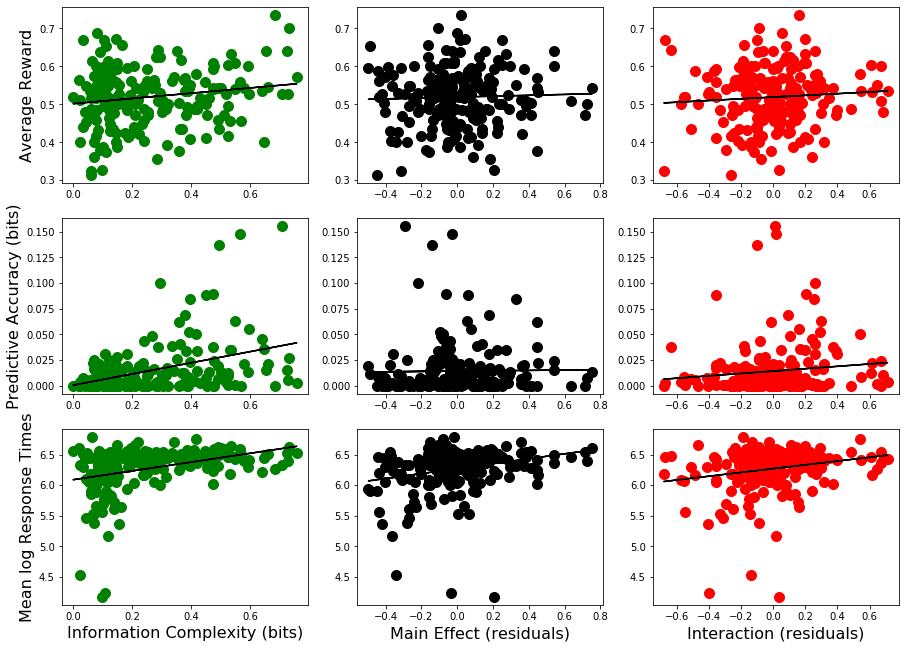

In [4]:
# Import complexity data and other behavioral metrics
# Values below computed in Filipowicz_etal_MBMF_Bound_Computing.ipynb
subInfo = pickle.load(open('./data/sub_cx_behav.pkl','rb'))

# Extract the variables we need
ipasts = np.array([subInfo[key]['Ipast_all'] for key in subInfo.keys()])   # Full information complexity
ifutures = np.array([subInfo[key]['Ifuture'] for key in subInfo.keys()])   # Predictive accuracy
rew = np.array([subInfo[key]['PropCorr'] for key in subInfo.keys()])       # Proportion correct responses
optim = np.array([subInfo[key]['PropRich'] for key in subInfo.keys()])     # Proportion optimal choices
inter = np.array([subInfo[key]['Int'] for key in subInfo.keys()])          # Interaction
me = np.array([subInfo[key]['ME'] for key in subInfo.keys()])              # Main effect
logRT = np.array([subInfo[key]['Mean_logRT'] for key in subInfo.keys()])   # log first-step response times

# Create pandas data frame for plots/correlations below
cx_me_int_df = pd.DataFrame({
    'Complexity':ipasts,
    'Accuracy': ifutures,
    'PropCorr': rew,
    'PropOtim': optim,
    'Inter': inter,
    'ME': me,
    'logRT':logRT
})

# Get residuals for plots below
# Main effect residuals
test_me_resid = sm.ols(formula='ME ~ Inter',data=cx_me_int_df).fit()
me_pred = test_me_resid.predict(cx_me_int_df[['Inter']])
me_resid = cx_me_int_df['ME'].values-me_pred

# Interaction residuals
test_int_resid = sm.ols(formula='Inter ~ ME',data=cx_me_int_df).fit()
int_pred = test_int_resid.predict(cx_me_int_df[['ME']])
int_resid = cx_me_int_df['Inter'].values-int_pred

# Test desired correlations
# Spearman correlations for all full complexity values
print('Complexity vs Predictive Accuracy')
print(spearmanr(ipasts,ifutures))
print('\nComplexity vs Average Reward')
print(spearmanr(ipasts,rew))
print('\nComplexity vs log Response Times')
print(spearmanr(ipasts,logRT))

# Partial spearman correlations for main effect
print('\nMain Effect vs Predictive Accuracy')
print(pingouin.partial_corr(data=cx_me_int_df,x='ME',y='Accuracy',y_covar='Inter',method='spearman'))
print('\nMain Effect vs Average Reward')
print(pingouin.partial_corr(data=cx_me_int_df,x='ME',y='PropCorr',y_covar='Inter',method='spearman'))
print('\nMain Effect vs log response time')
print(pingouin.partial_corr(data=cx_me_int_df,x='ME',y='logRT',y_covar='Inter',method='spearman'))

# Partial spearman correlations for interaction
print('\nInteraction vs Predictive Accuracy')
print(pingouin.partial_corr(data=cx_me_int_df,x='Inter',y='Accuracy',y_covar='ME',method='spearman'))
print('\nnInteraction vs Average Reward')
print(pingouin.partial_corr(data=cx_me_int_df,x='Inter',y='PropCorr',y_covar='ME',method='spearman'))
print('\nnInteraction vs log response time')
print(pingouin.partial_corr(data=cx_me_int_df,x='Inter',y='logRT',y_covar='ME',method='spearman'))

# Plots
# Get residuals for plots below
# Main effect residuals
test_me_resid = sm.ols(formula='ME ~ Inter',data=cx_me_int_df).fit()
me_pred = test_me_resid.predict(cx_me_int_df[['Inter']])
me_resid = cx_me_int_df['ME'].values-me_pred

# Interaction residuals
test_int_resid = sm.ols(formula='Inter ~ ME',data=cx_me_int_df).fit()
int_pred = test_int_resid.predict(cx_me_int_df[['ME']])
int_resid = cx_me_int_df['Inter'].values-int_pred

# Plot correlations with information complexity
figure(3,(15,11))
xs = [ipasts,me_resid,int_resid]
ys = [rew,ifutures,logRT]
xnames = ['Information Complexity (bits)', 'Main Effect (residuals)', 'Interaction (residuals)']
ynames = ['Average Reward', 'Predictive Accuracy (bits)', 'Mean log Response Times']
col = ['g','k','r']
idx = 1
for iy in np.arange(len(xs)):
    for ix in np.arange(len(ys)):
        subplot(3,3,idx)
        plot(xs[ix],ys[iy],'o'+col[ix],markersize=10)
        z = np.polyfit(xs[ix], ys[iy], 1)
        p = np.poly1d(z)
        plot(xs[ix],p(xs[ix]),"k-")
        if idx in [1,4,7]:
            ylabel(ynames[iy],size=16)
        if idx > 6:
            xlabel(xnames[ix],size=16)
        idx+=1
savefig('../Figures/Figure4/Fig4_corrs.eps')

## Figure 5 - correlations with reduced information complexity

            n         r         CI95%        r2    adj_r2         p-val  power
spearman  197  0.468972  [0.35, 0.57]  0.219935  0.211893  3.634940e-12    1.0
            n        r         CI95%        r2    adj_r2         p-val  power
spearman  197  0.45888  [0.34, 0.56]  0.210571  0.202433  1.187914e-11    1.0


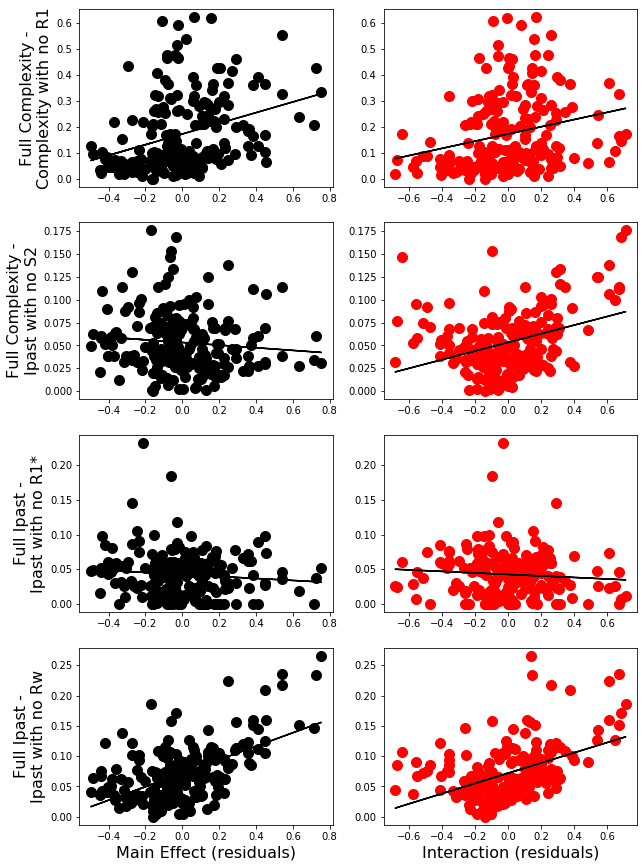

In [5]:
# Get necessary info
subInfo = pickle.load(open('./data/sub_cx_behav.pkl','rb'))

# Extract the variables we need
inter = np.array([subInfo[key]['Int'] for key in subInfo.keys()])                     # Interaction
me = np.array([subInfo[key]['ME'] for key in subInfo.keys()])                         # Main effect
ipasts = np.array([subInfo[key]['Ipast_all'] for key in subInfo.keys()])              # Full complexity
ip_noR1 = np.array([subInfo[key]['Ipast_noR1'] for key in subInfo.keys()])            # Info CX without R1
ip_noS2 = np.array([subInfo[key]['Ipast_noS2'] for key in subInfo.keys()])            # Info CX without S2
ip_noRw = np.array([subInfo[key]['Ipast_noRw'] for key in subInfo.keys()])            # Info CX without Rw
ip_noR1_star = np.array([subInfo[key]['Ipast_noR1_star'] for key in subInfo.keys()])  # Info CX without R1 star

# Get residuals for plots below
# Main effect residuals
test_me_resid = sm.ols(formula='ME ~ Inter',data=cx_me_int_df).fit()
me_pred = test_me_resid.predict(cx_me_int_df[['Inter']])
me_resid = cx_me_int_df['ME'].values-me_pred

# Interaction residuals
test_int_resid = sm.ols(formula='Inter ~ ME',data=cx_me_int_df).fit()
int_pred = test_int_resid.predict(cx_me_int_df[['ME']])
int_resid = cx_me_int_df['Inter'].values-int_pred

# Plots
xs = [me_resid, int_resid]
ys = [ip_noR1,ip_noS2,ip_noR1_star,ip_noRw]
xnames = ['Main Effect (residuals)', 'Interaction (residuals)']
ynames = ['Full Complexity -\nComplexity with no R1', 'Full Complexity -\nIpast with no S2','Full Ipast -\nIpast with no R1*','Full Ipast -\nIpast with no Rw']
col = ['k','r']
idx = 1
figure(4,(10,15))
for iy in np.arange(len(ys)):
    for ix in np.arange(len(xs)):
        subplot(4,2,idx)
        plot(xs[ix],ipasts-ys[iy],'o'+col[ix],markersize=10)
        z = np.polyfit(xs[ix], ipasts-ys[iy], 1)
        p = np.poly1d(z)
        plot(xs[ix],p(xs[ix]),"k-")
        if idx in [1,3,5,7]:
            ylabel(ynames[iy],size=16)
        if idx > 6:
            xlabel(xnames[ix],size=16)
        idx+=1
        
        
# Test correlations
dd = pd.DataFrame({
    'ME':me,
    'Int':inter,
    'noR1': ipasts-ip_noR1,
    'noS2': ipasts-ip_noS2,
    'noR1*': ipasts-ip_noR1_star,
    'noRw': ipasts-ip_noRw
})

# Semi-partial correlations
print(pingouin.partial_corr(data=dd,x='ME',y='noRw',y_covar='Int',method='spearman'))
print(pingouin.partial_corr(data=dd,x='Int',y='noRw',y_covar='ME',method='spearman'))

savefig('../Figures/Figure5/Fig5_corrs.eps')

## Figure 6 - Info Complexity of simulations

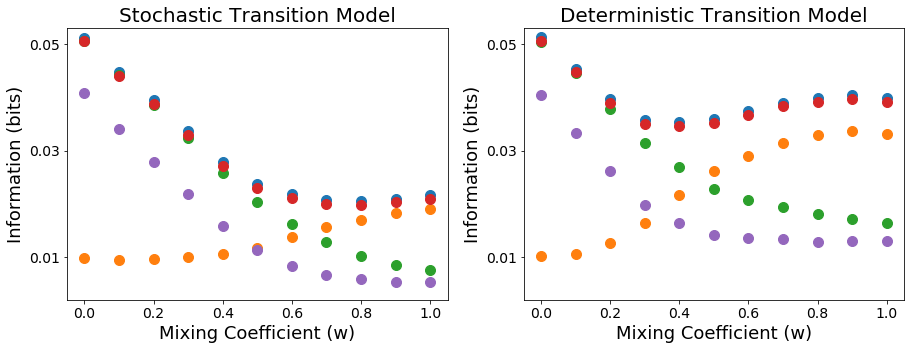

In [6]:
# Plot information values for different simulations
# Function to get simulated info complexity values
def getSimCx(d):
    
    # Model-based mixing coefficient
    ws = np.array([key for key in d.keys()])
    ipast = np.array([np.mean(d[key]['Ipast']) for key in d.keys()])
    ipast_noR1 = np.array([np.mean(d[key]['Ipast_noR1']) for key in d.keys()])
    ipast_noS2 = np.array([np.mean(d[key]['Ipast_noS2']) for key in d.keys()])
    ipast_noR1_star = np.array([np.mean(d[key]['Ipast_noR1star']) for key in d.keys()])
    ipast_noRw = np.array([np.mean(d[key]['Ipast_noRw']) for key in d.keys()])
    
    return([ws,ipast,ipast_noR1,ipast_noS2,ipast_noR1_star,ipast_noRw])

# Plotting function
def pltSimCx(d,title,psize=10):
    plt.plot(d[0],d[1],'o',label='$I_{past}$',ms=10)
    plt.plot(d[0],d[2],'o',label='$I_{past} - no R1$',ms=10)
    plt.plot(d[0],d[3],'o',label='$I_{past} - no S2$',ms=10)
    plt.plot(d[0],d[4],'o',label='$I_{past} - no R1*$',ms=10)
    plt.plot(d[0],d[5],'o',label='$I_{past} - no Rw$',ms=10)
    plt.xlabel('Mixing Coefficient (w)',size=18)
    plt.ylabel('Information (bits)',size=18)
    plt.title(title,size=20)
    plt.yticks([.010,.030,.050],size=14)
    plt.xticks(size=14)
    plt.ylim([0.002,0.053])

# Alpha = 1    
w_dict_stoch1 = pickle.load(open('./data/MB_stoch_Ipred1.pkl','rb'))
w_dict_det1 = pickle.load(open('./data/MB_det_Ipred1.pkl','rb'))
stoch1 = getSimCx(w_dict_stoch1)
det1 = getSimCx(w_dict_det1)

plt.figure(1,(15,5))
plt.subplot(1,2,1)
pltSimCx(stoch1,'Stochastic Transition Model')

plt.subplot(1,2,2)
pltSimCx(det1,'Deterministic Transition Model')
savefig('../Figures/Figure6/Fig6_sims.eps')

## Figure 7 - Model fits vs complexity and RTs

Stochastic model fits

W vs Information Complexity
SpearmanrResult(correlation=0.023936662805408276, pvalue=0.7384724516256808)

W vs Accuracy
SpearmanrResult(correlation=0.03608280971206177, pvalue=0.6146919086739565)

W vs log RT
SpearmanrResult(correlation=-0.06832386854141749, pvalue=0.34009182796887805)

Deterministic model fits

W vs Information Complexity
SpearmanrResult(correlation=0.10933639722617244, pvalue=0.12615728345655045)

W vs Accuracy
SpearmanrResult(correlation=0.015334173419718131, pvalue=0.8306497548149427)

W vs log RT
SpearmanrResult(correlation=-0.03546864061729907, pvalue=0.6207315788055623)


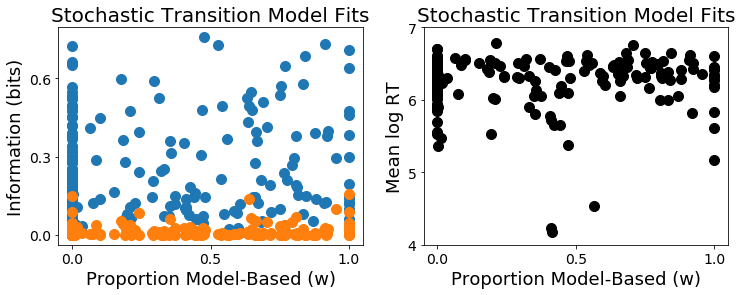

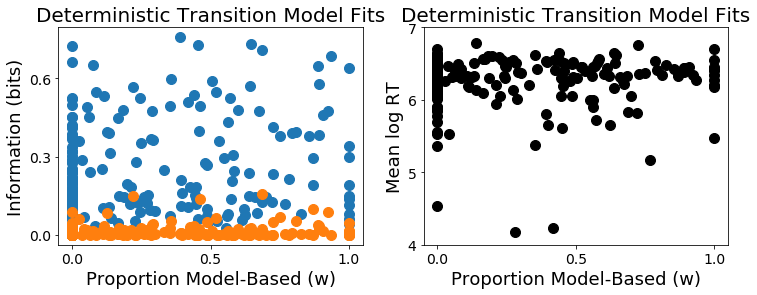

In [7]:
# Import complexity data and other behavioral metrics
# Values below computed in Filipowicz_etal_MBMF_Bound_Computing.ipynb
subInfo = pickle.load(open('./data/sub_cx_behav.pkl','rb'))

# Extract the variables we need
ipasts = np.array([subInfo[key]['Ipast_all'] for key in subInfo.keys()])   # Full information complexity
ifutures = np.array([subInfo[key]['Ifuture'] for key in subInfo.keys()])   # Predictive accuracy
w_s = np.array([subInfo[key]['w_stoch'] for key in subInfo.keys()])       # W values for stochastic model
w_d = np.array([subInfo[key]['w_det'] for key in subInfo.keys()])         # W values for deterministic model
logRT = np.array([subInfo[key]['Mean_logRT'] for key in subInfo.keys()])   # log first-step response times

def pltWCor(w,d,title):
    subplot(1,2,1)
    plt.plot(w,d[0],'o',ms=10)
    plt.plot(w,d[1],'o',ms=10)
    ylabel('Information (bits)',size=18)
    xlabel('Proportion Model-Based (w)',size=18)
    plt.yticks([0,.3,.6],size=14)
    plt.xticks([0,.5,1],size=14)
    plt.title(title,size=20)
    
    print('\nW vs Information Complexity')
    print(spearmanr(w,d[0]))
    print('\nW vs Accuracy')
    print(spearmanr(w,d[1]))
    print('\nW vs log RT')
    print(spearmanr(w,d[2]))
    
    subplot(1,2,2)
    plt.plot(w,d[2],'ok',ms=10)
    ylabel('Mean log RT',size=18)
    xlabel('Proportion Model-Based (w)',size=18)
    plt.yticks([4,5,6,7],size=14)
    plt.xticks([0,.5,1],size=14)
    plt.title(title,size=20)
    

plt.figure(5,(12,4))
print('Stochastic model fits')
pltWCor(w_s,[ipasts,ifutures,logRT],'Stochastic Transition Model Fits')
savefig('../Figures/Figure7/Fig7_wcx_stoch.eps')

print('\nDeterministic model fits')
plt.figure(6,(12,4))
pltWCor(w_d,[ipasts,ifutures,logRT],'Deterministic Transition Model Fits')
savefig('../Figures/Figure7/Fig7_wcx_det.eps')